# Лабораторная работа 3. Итеративные и рекурсивные алгоритмы

Вариант: 3

### Задание:

Функция Аккермана определяется следующим образом:
$$A(0,y) = y+1;$$
$$A(x,0) = A(x-1,1);$$
$$A(x,y) = A(x-1,A(x,y-1)).$$
Здесь $x$ и $y$ – целые неотрицательные числа. Определим модулярную функцию Аккермана как $A \mod m$, где параметр $m$ - целое неотрицательное число. Реализуйте рекурсивный алгоритм построения таблицы значений этой функции.



### Реализация алгоритма

## Задание 1:

In [43]:
def ackermann_rec(m, n):
    if m == 0:
        return n + 1
    elif n == 0:
        return ackermann_rec(m - 1, 1)
    else:
        return ackermann_rec(m - 1, ackermann_rec(m, n - 1))

print(ackermann_rec(2, 3))

9


## Задание 2:

In [40]:
def ackermann_non_rec(m, n):

    stack = deque([])
    stack.extend([m, n])

    while  len(stack) > 1:
        n, m = stack.pop(), stack.pop()

        if   m == 0:
            stack.append(n + 1)
        elif n == 0:
            stack.extend([m-1, 1])
        else:
            stack.extend([m-1, m, n-1])

    return stack[0]

print(ackermann_non_rec(2, 3))

9


## Задание 3:

### Блок-схема алгоритма

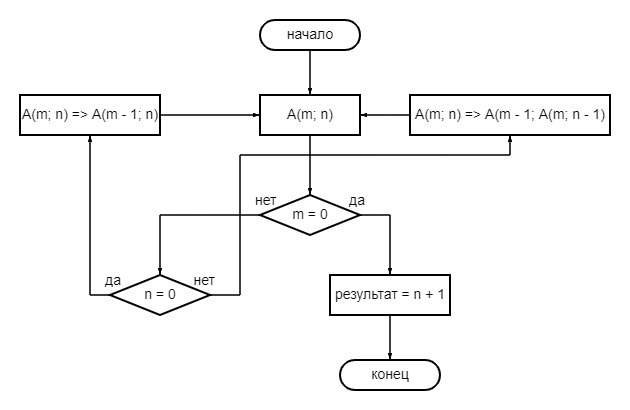

### Оценка:

Оценить точную верхнюю границу размерности задачи, для которой при рекурсивной реализации не происходит переполнение стека вызовов, довольно трудно. Однако, можно сделать некоторые предположения и оценки, исходя из характеристик реализации рекурсии в конкретной среде исполнения.

Для функции Аккермана известно, что она растет очень быстро, поэтому уже для относительно небольших значений аргументов может потребоваться много рекурсивных вызовов. Например, для значений $m=4$ и $n=2$ функция Аккермана требует 2,048 вызовов.

Верхняя граница размерности задачи, для которой при рекурсивной реализации не происходит переполнение стека вызовов, будет зависеть от доступной памяти и глубины стека вызовов в конкретной среде исполнения. Например, в Python стандартная глубина стека вызовов составляет 1000, но она может быть изменена при необходимости.

В целом, для большинства практических задач, при рекурсивной реализации функции Аккермана можно столкнуться с переполнением стека вызовов уже для относительно небольших значений аргументов, например, при $m=4$ и $n=2$. Поэтому для больших значений аргументов лучше использовать реализацию без рекурсии или с использованием дополнительной оптимизации, такой как хвостовая рекурсия.

### Модернизация:

In [41]:
def memoized(func):
    cache = {}
    def memoizer(x, y):
        if (x, y) not in cache:
            cache[(x, y)] = func(x, y)
        return cache[(x, y)]
    return memoizer

@memoized
def ackermann_mod(x, y):
    if x == 0:
        return y + 1
    elif y == 0:
        return ackermann_mod(x - 1, 1)
    else:
        return ackermann_mod(x - 1, ackermann_mod(x, y - 1))

print(ackermann_mod(3, 4))

125


### Сравнение:

In [42]:
import time

def measure_time(func, *args, **kwargs):
    start = time.time()
    result = func(*args, **kwargs)
    end = time.time()
    return result, end - start

m = 3
n = 8

# Рекурсивная реализация
result_rec, time_rec = measure_time(ackermann_rec, m, n)

# Рекурсивная реализация
result_non_rec, time_non_rec = measure_time(ackermann_non_rec, m, n)

# Модернизированная реализация
result_mod, time_mod = measure_time(ackermann_mod, m, n)

print(f"Рекурсивная реализация: {result_rec}, время: {time_rec}")
print(f"Рекурсивная реализация: {result_non_rec}, время: {time_non_rec}")
print(f"Модернизированная реализация: {result_mod}, время: {time_mod}")


Рекурсивная реализация: 2045, время: 1.7487742900848389
Рекурсивная реализация: 2045, время: 2.9930455684661865
Модернизированная реализация: 2045, время: 0.0
